# Examen de Sistemas Inteligentes junio 2024
## Parte práctica
### Nombre del alumno

Pon aquí tu nombre.

***

**Instrucciones:** Carga el fichero pet_adoption_data.csv, y contexta las preguntas debajo de los encabezados.


### Ejercicio 1

In [ ]:
#Entorno utilizado para la practica : Python 3.12.7 distribución anaconda
#procedemos a cargar las librerías y también los datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
#definimos una variable para poder cargar más comodamente los ejemplos
filas_ejemplo=3
debug= False
#cargamos los datos en una variable 
datos = pd.read_csv("pet_adoption_data.csv")

#mostramos los datos para saber con qué trabajamos exactamente
display (datos.head(n=filas_ejemplo)) 
#mostramos el número de filas y columnas existentes
if(debug):
    display(f"Filas existentes {datos.index.size} Columnas existentes {datos.columns.size}")

#vista de datos únicos
if(debug):
    for i in datos.columns:
        display(f"columna= {i}" ,datos[i].unique())

#comprobamos que no haya nulos

display("lista de nulos",datos.isnull().sum())

#vemos los datos que son nulos (por si se puede solucionar)
if debug:
    display("pre tratados " ,datos[datos.isnull().any(axis=1)])

datos = datos.dropna(subset=['PetID'])
datos= datos.dropna(subset=['WeightKg'])

#cambiamos los id para que sean de tipo entero
datos['PetID'] = np.ceil(datos['PetID']).astype(int)

#display("POST tratados" ,datos[datos.isnull().any(axis=1)])
if debug:
    display(datos[datos["Breed"]== "Parakeet"])
#vemos que parakeet es de petType bird por lo que lo cambiamos en su nulo


#corregimos el dato del pajaro que estaba mal
datos["PetType"]= np.where(datos["PetID"]==614,'Bird',datos["PetType"])

if(debug):
    display("POST tratados" ,datos[datos.isnull().any(axis=1)])
    display(datos.isnull().sum())

display (datos.head(n=filas_ejemplo))


#usamos one hot encoder para codificar los atributos que queremos

encoder = OneHotEncoder(sparse_output=False)

array= ["PetType","Breed","Color"]

for i in array:


    aux_HOT= encoder.fit_transform(datos[i].to_numpy().reshape(-1,1))
    if debug:
        display(i)

    column_names = encoder.get_feature_names_out([i])

    datos=pd.concat([datos, pd.DataFrame(aux_HOT,columns=column_names,index=datos.index)],axis=1)
    #eliminamos la columna ya tratada
    datos=datos.drop(i,axis=1)

display(datos["Size"].unique())

datos["Size"] = datos["Size"].replace({
    'Large': 3,
    'Medium': 2,
    'Small': 1
})


display (datos.head(n=filas_ejemplo))


,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500.0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501.0,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502.0,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0


'lista de nulos'

PetID                 2
PetType               1
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              1
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0


array(['Large', 'Medium', 'Small'], dtype=object)

C:\Users\santi\AppData\Local\Temp\ipykernel_22004\1346047026.py:74: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos["Size"] = datos["Size"].replace({


,PetID,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,...,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Black,Color_Brown,Color_Gray,Color_Orange,Color_White
0,500,131,3,5.039768,1,0,27,140,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,501,73,3,16.086727,0,0,8,235,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,502,136,2,2.076286,0,0,85,385,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Ejercicio 2

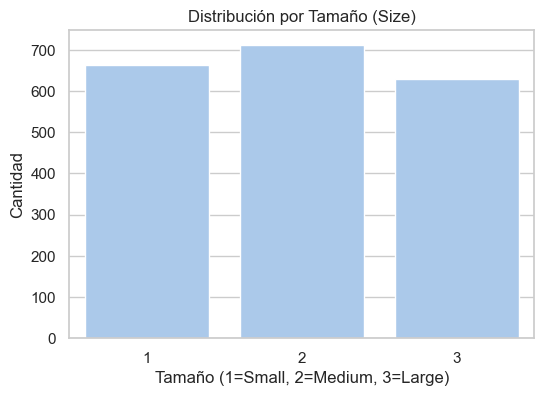

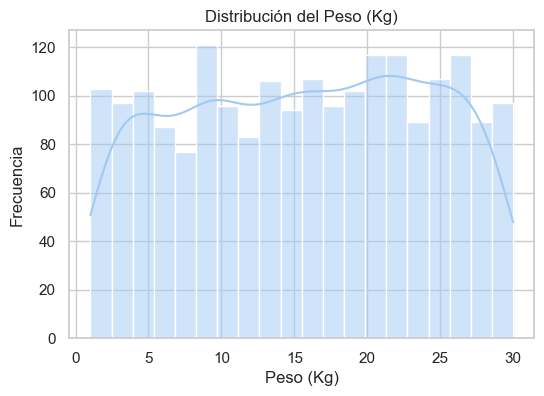

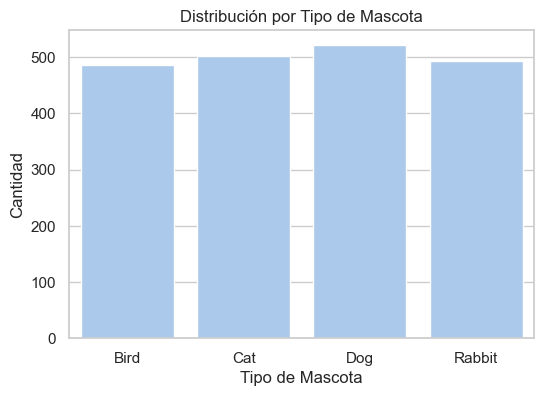

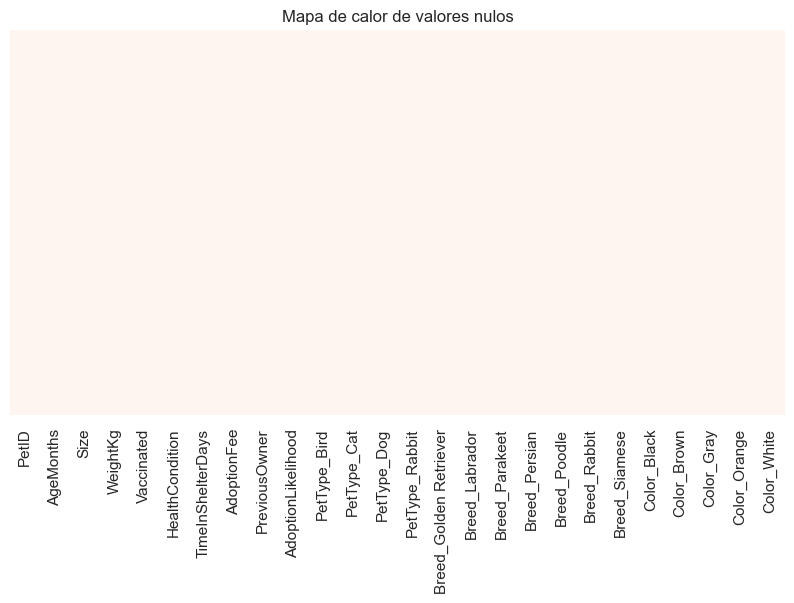

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

# 1. Distribución de 'Size'
plt.figure(figsize=(6,4))
sns.countplot(x='Size', data=datos, order=[1, 2, 3])
plt.title('Distribución por Tamaño (Size)')
plt.xlabel('Tamaño (1=Small, 2=Medium, 3=Large)')
plt.ylabel('Cantidad')
plt.show()

# 2. Histograma del peso
plt.figure(figsize=(6,4))
sns.histplot(datos['WeightKg'], bins=20, kde=True)
plt.title('Distribución del Peso (Kg)')
plt.xlabel('Peso (Kg)')
plt.ylabel('Frecuencia')
plt.show()

# 3. Distribución de tipo de mascota (antes de codificación)
# Asumimos que todavía tienes las columnas codificadas como 'PetType_Dog', etc.
pettype_cols = [col for col in datos.columns if col.startswith('PetType_')]
if pettype_cols:
    pettype_counts = datos[pettype_cols].sum()
    plt.figure(figsize=(6,4))
    sns.barplot(x=pettype_counts.index.str.replace("PetType_", ""), y=pettype_counts.values)
    plt.title('Distribución por Tipo de Mascota')
    plt.xlabel('Tipo de Mascota')
    plt.ylabel('Cantidad')
    plt.show()

# 4. Heatmap de valores nulos
plt.figure(figsize=(10,5))
sns.heatmap(datos.isnull(), cbar=False, cmap='Reds', yticklabels=False)
plt.title('Mapa de calor de valores nulos')
plt.show()



### Ejercicio 3

In [ ]:
#code here

### Ejercicio 4

In [ ]:
#code here

### Ejercicio 5

In [ ]:
#code here